In [1]:
#1. Import Libraries
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
#2. Load Dataset
df_train=pd.read_csv(r"C:\Users\goex1\Desktop\Data Science - House Projekt\train.csv")
df_test=pd.read_csv(r"C:\Users\goex1\Desktop\Data Science - House Projekt\test.csv")

print("--------------------------------------------------------------------------------")

#3. Show first 3 rows from training dataset - first overview of training dataset
print(df_train.head(3))



--------------------------------------------------------------------------------
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  

[3 rows x 81 columns]


In [3]:
#3. Descriptive statistics of numeric variables of training dataset
print("descriptive statistics of numeric variables")
print(df_train.describe())

descriptive statistics of numeric variables
                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904

In [4]:
#4. Data Cleaning - if required
print("How much missing values in variables?")
print(df_train.isnull().sum())

How much missing values in variables?
Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


descriptive statistics of target SalePrice
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


Text(0.5, 1.0, 'Histplot of SalePrice')

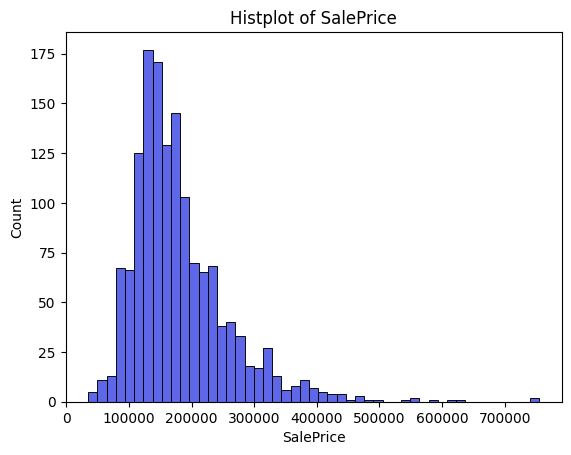

In [ ]:
#5a. Descriptive statistics of target
print("descriptive statistics of target SalePrice")
print(df_train.SalePrice.describe())

#5b. Histplot of target (SalePrice) with given color Hex-Code #2734E0 :
sns.histplot(df_train.SalePrice, color="#2734E0")
plt.title("Histplot of SalePrice")

c:\Users\goex1\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


Text(0.5, 1.0, 'Boxplot of SalePrice')

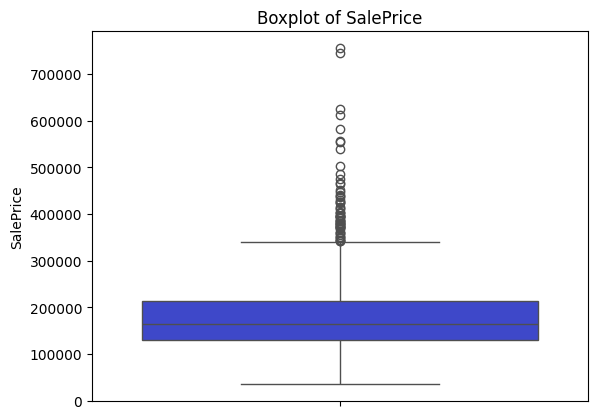

In [ ]:
#5c. Boxplot-SalePrice with Hexcode #2734E0:
sns.boxplot(df_train.SalePrice, color="#2734E0")
plt.title("Boxplot of SalePrice")

In [ ]:
#6a. Table - Correlation SalePrice with other features
print("Table - Correlation SalePrice with other features")
df_train.corr(numeric_only=True)["SalePrice"].sort_values(ascending=False)

Table - Correlation SalePrice with other features


SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

top5 highest positive correlations SalePrice with other features
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
TotalBsmtSF    0.613581
Name: SalePrice, dtype: float64


([0, 1, 2, 3, 4],
 [Text(0, 0, 'OverallQual'),
  Text(1, 0, 'GrLivArea'),
  Text(2, 0, 'GarageCars'),
  Text(3, 0, 'GarageArea'),
  Text(4, 0, 'TotalBsmtSF')])

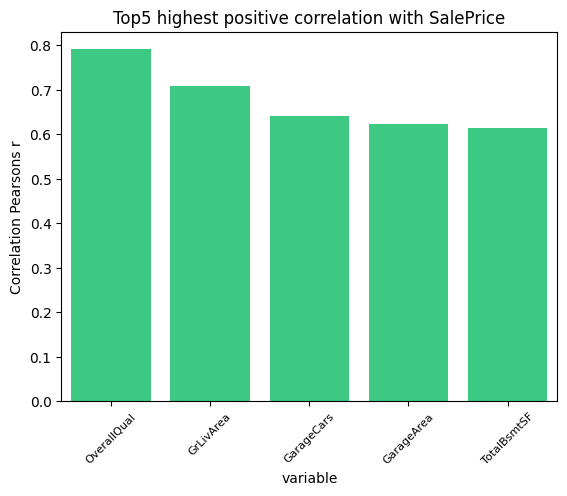

In [ ]:
#6b. Barplot of biggest positive correlations#
top5_positive_correlations=df_train.corr(numeric_only=True)["SalePrice"].sort_values(ascending=False).drop("SalePrice").head(5)

print("top5 highest positive correlations SalePrice with other features")
print(top5_positive_correlations)

sns.barplot(top5_positive_correlations, color="#27E083")
plt.title("Top5 highest positive correlation with SalePrice")
plt.ylabel("Correlation Pearsons r")
plt.xlabel("variable")
plt.xticks(rotation=45, fontsize=8)

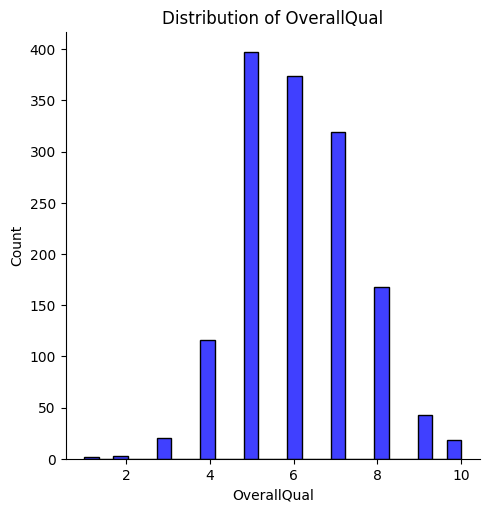

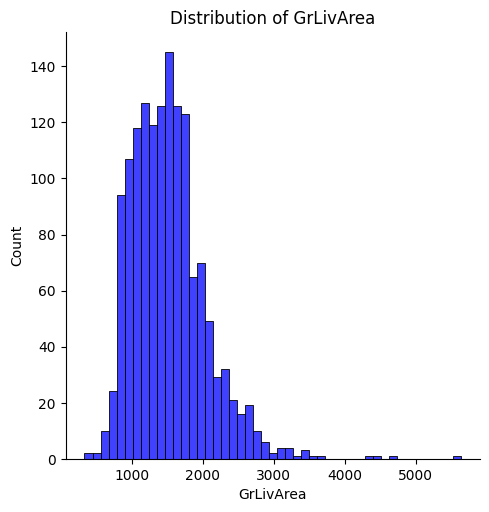

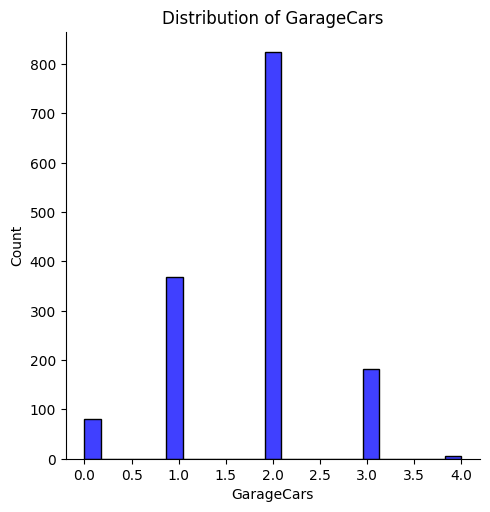

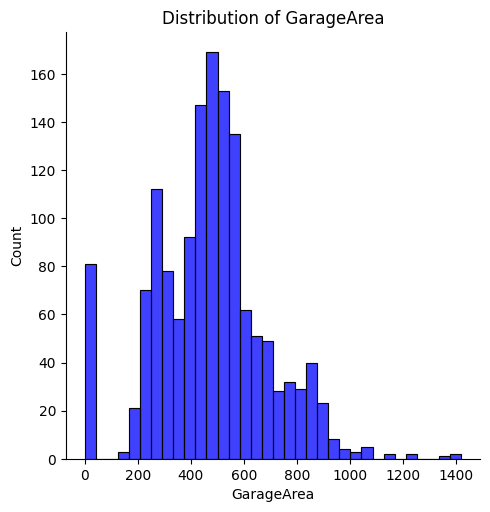

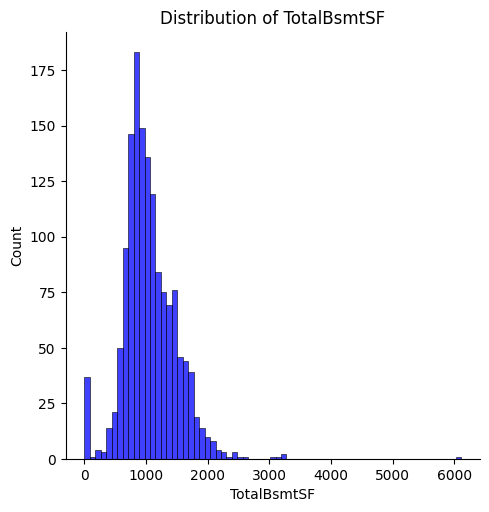

In [ ]:
#6c. Save all relevant features with correlations r>0,5 in relevant_variables
relevant_variables=['OverallQual','GrLivArea','GarageCars', 'GarageArea','TotalBsmtSF']

for feature in relevant_variables:
    sns.displot(df_train[feature],color="blue")
    plt.title(f"Distribution of {feature}")

In [ ]:
#7. Preprocessing training data
X_train = df_train[relevant_variables]
y_train = df_train['SalePrice']


#8. Handle missing data
X_train = X_train.fillna(X_train.mean())

In [ ]:
#9.Linear Regression
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(X_train,y_train)


LinearRegression()

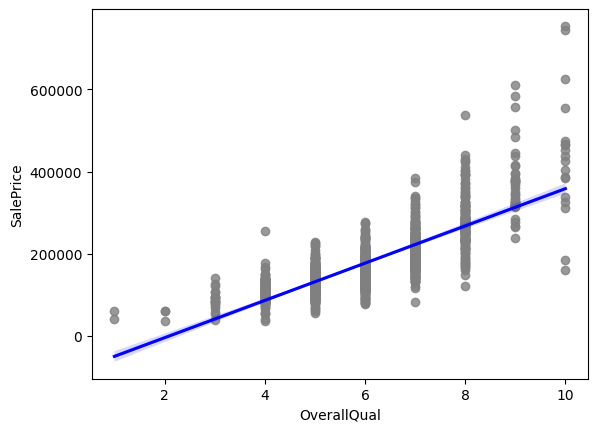

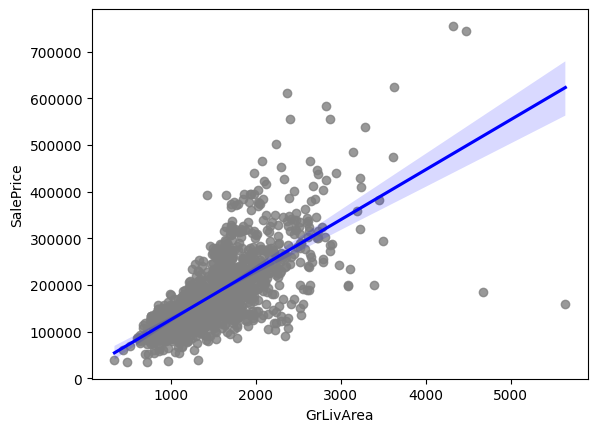

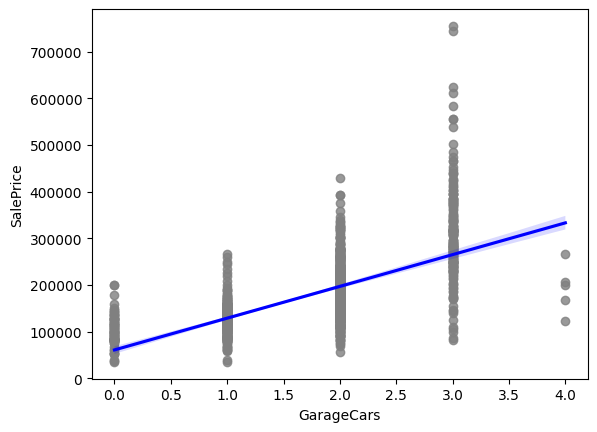

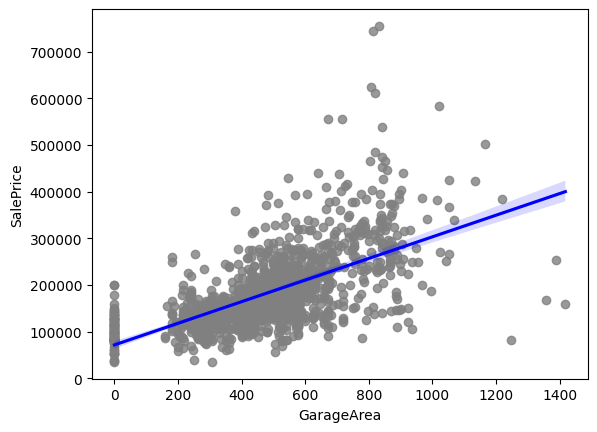

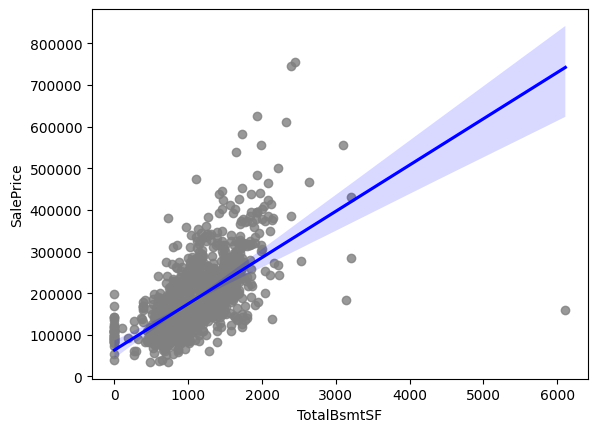

In [ ]:
relevant_variables=['OverallQual','GrLivArea','GarageCars', 'GarageArea','TotalBsmtSF']

#10. Scatterplots of relevant features
for feature in relevant_variables:
    sns.regplot(data=df_train,y='SalePrice', x=feature, scatter_kws={'color': 'gray'}, line_kws={'color': 'blue'})
    plt.xlabel(feature)
    plt.show()


In [ ]:
#11. calculation of r²
r_square_train=lr.score(X_train,y_train)

print(f"r² training: {r_square_train}")


r² training: 0.7611083041001819


In [ ]:
#12. Preprocessing training data
X_test=df_test[relevant_variables]

#13. handle with missing values
X_test=X_test.fillna(X_train.mean())

y_pred_test=lr.predict(X_test)

In [ ]:

#14. save predictions in local csv-data
df_test["Predicted_Sale_Price"] = y_pred_test
df_test.to_csv(r"C:\Users\goex1\Desktop\Data Science - House Projekt\Vorhersage.csv", index=False)
print(y_pred_test)



[114568.83751429 164757.9875673  159551.62764989 ... 152121.54494302
  91817.78050759 243209.76854418]


In [20]:
#15. show coefficients of regression
print("Coefficients of features:")

for feature, coef in zip(relevant_variables, lr.coef_):
    print(f"{feature}: {coef:.2f}")


Coefficients of features:
OverallQual: 23635.01
GrLivArea: 45.35
GarageCars: 14544.32
GarageArea: 17.13
TotalBsmtSF: 31.50


In [19]:
#16.Interpretation of results

print("Interpretation of results")
print("------------")

print("If all other variables remain constant, an increase in OverallQual by 1 leads to an average increase in the sales price of 23635$.")
print("If all other variables remain constant, an increase in GrLivArea by 1 leads to an average increase in the sales price of 45$.")
print("If all other variables remain constant, an increase in GarageCars by 1 leads to an average increase in the sales price of 14544$.")
print("If all other variables remain constant, an increase in GarageArea by 1 leads to an average increase in the sales price of 17$.")
print("If all other variables remain constant, an increase in TotalBsmtSF by 1 leads to an average increase in the sales price of 31$.")



Interpretation of results
------------
If all other variables remain constant, an increase in OverallQual by 1 leads to an average increase in the sales price of 23635$.
If all other variables remain constant, an increase in GrLivArea by 1 leads to an average increase in the sales price of 45$.
If all other variables remain constant, an increase in GarageCars by 1 leads to an average increase in the sales price of 14544$.
If all other variables remain constant, an increase in GarageArea by 1 leads to an average increase in the sales price of 17$.
If all other variables remain constant, an increase in TotalBsmtSF by 1 leads to an average increase in the sales price of 31$.
